# Read Data
First, we read the csv file as a Pnadas dataframe. The dataset is available on Kaggle [Link](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

In [19]:
import pandas as pd

data = pd.read_csv("/Users/basmaashour/Desktop/healthcare-dataset-stroke-data.csv") 
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Drop some columns which is not relevent or has empty values**

In [20]:
fields_to_drop = ['id',]
data = data.drop(fields_to_drop, axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Check if we have null data**

<AxesSubplot:>

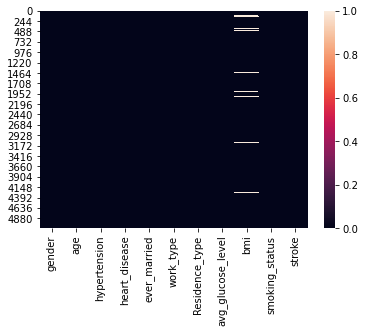

In [21]:
import seaborn as sb

sb.heatmap(data.isnull())

**convert To category**

In [22]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
num_cols = ['age', 'avg_glucose_level', 'bmi']

data[cat_cols] = data[cat_cols].astype('category')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Split the data 20% for testing**

In [23]:
from sklearn.model_selection import train_test_split

y = data.pop('stroke')
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, '\t', X_test.shape)
print(y_train.shape, '\t', y_test.shape)

(4088, 10) 	 (1022, 10)
(4088,) 	 (1022,)
